In [19]:
import matplotlib.pyplot as plt
from rl_agents.rl_utils import moving_average

In [20]:
def readfile_to_list(path):
    # 打开文件
    with open(path, 'r') as file:
        # 读取每一行并转换为整数
        numbers = [float(line.strip()) for line in file.readlines()]
    
    return numbers

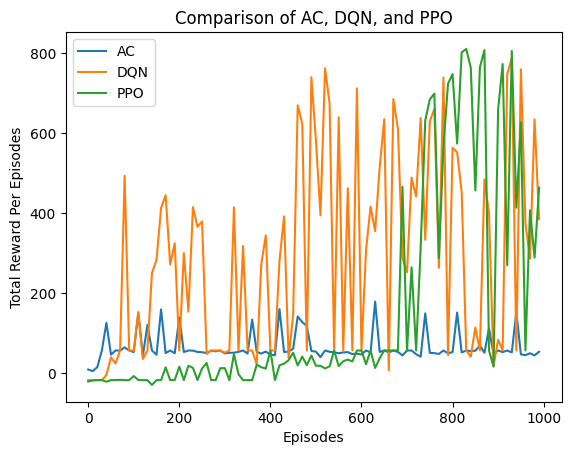

In [22]:
AC_return_list = readfile_to_list('./data/AC_return_list.txt')
DQN_return_list = readfile_to_list('./data/DQN_return_list.csv')
PPO_return_list = readfile_to_list('./data/PPO_return_list.txt')
# AC_return_list, DQN_return_list, PPO_return_list

# 设置因子表示每隔多少个点绘制一个数据点
thin_factor = 10

# 创建一个新的x轴数据，以保证横坐标的一致性
epochs = list(range(len(AC_return_list)))[::thin_factor]

# 绘制每个列表
plt.plot(epochs, AC_return_list[::thin_factor], label='AC')
plt.plot(epochs, DQN_return_list[::thin_factor], label='DQN')
plt.plot(epochs, PPO_return_list[::thin_factor], label='PPO')

# 添加图例
plt.legend()

# 添加标题和轴标签（可选）
plt.title('Comparison of AC, DQN, and PPO')
plt.xlabel('Episodes')
plt.ylabel('Total Reward Per Episodes')


# 显示图表
plt.savefig('./data/return_comparison.png', dpi=300)
plt.show()

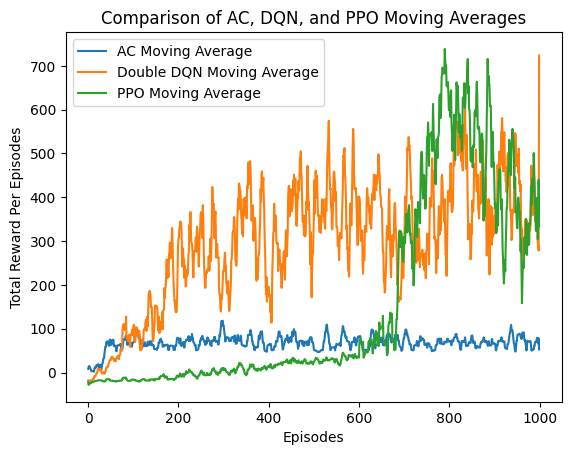

In [28]:
# 设置移动平均的窗口大小
window_size = 9

# 计算移动平均
AC_mv_avg = moving_average(AC_return_list, window_size)
DQN_mv_avg = moving_average(DQN_return_list, window_size)
PPO_mv_avg = moving_average(PPO_return_list, window_size)

# 创建一个新的x轴数据，以保证横坐标的一致性
# 注意：移动平均会减少数据点的数量
epochs = list(range(len(AC_mv_avg)))

# 绘制移动平均曲线
plt.plot(epochs, AC_mv_avg, label='AC')
plt.plot(epochs, DQN_mv_avg, label='Double DQN')
plt.plot(epochs, PPO_mv_avg, label='PPO')

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Comparison of AC, DQN, and PPO Moving Averages')
plt.xlabel('Episodes')
plt.ylabel('Total Reward Per Episodes')

# 保存图表
plt.savefig('./data/return_comparison_moving_average.png', dpi=300)

# 显示图表
plt.show()


In [24]:
AC_time = readfile_to_list('./data/AC_training_time.txt')
DQN_time = readfile_to_list('./data/DQN_time.csv')
PPO_time = readfile_to_list('./data/PPO_training_time.txt')

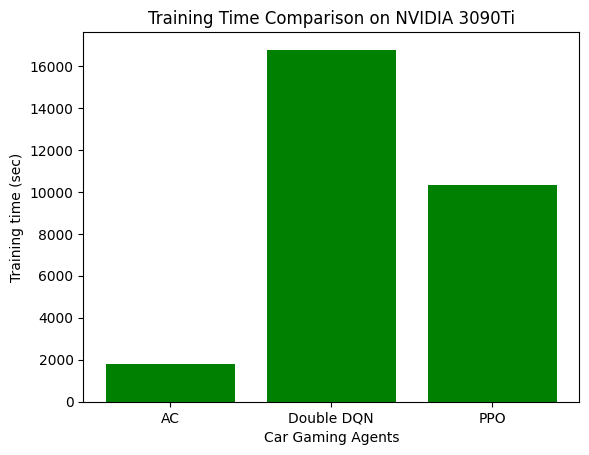

In [27]:
# 算法名称
algorithms = ['AC', 'Double DQN', 'PPO']

# 训练时间数据
training_times = [AC_time[0], DQN_time[0], PPO_time[0]]

# 创建柱状图
plt.bar(algorithms, training_times, color='green')

# 添加标题和轴标签
plt.title('Training Time Comparison on NVIDIA 3090Ti')
plt.xlabel('Car Gaming Agents')
plt.ylabel('Training time (sec)')

# 保存图表
plt.savefig('./data/training_time_comparison.png', dpi=300)

# 显示图表
plt.show()